In [44]:
n = .05
1 / (1+n)

0.9523809523809523

In [45]:
1 - n

0.95

Steady State: $$k^* = (\frac{sA} {n + δ})^{\frac{1} {1 - α}}$$

In [29]:
import matplotlib.pyplot as plt
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s A k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       A=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.A = n, s, δ, α, A
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, A = self.n, self.s, self.δ, self.α, self.A
        # Apply the update rule
        return (s * A * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, A = self.n, self.s, self.δ, self.α, self.A
        # Compute and return steady state
        return ((s * A) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

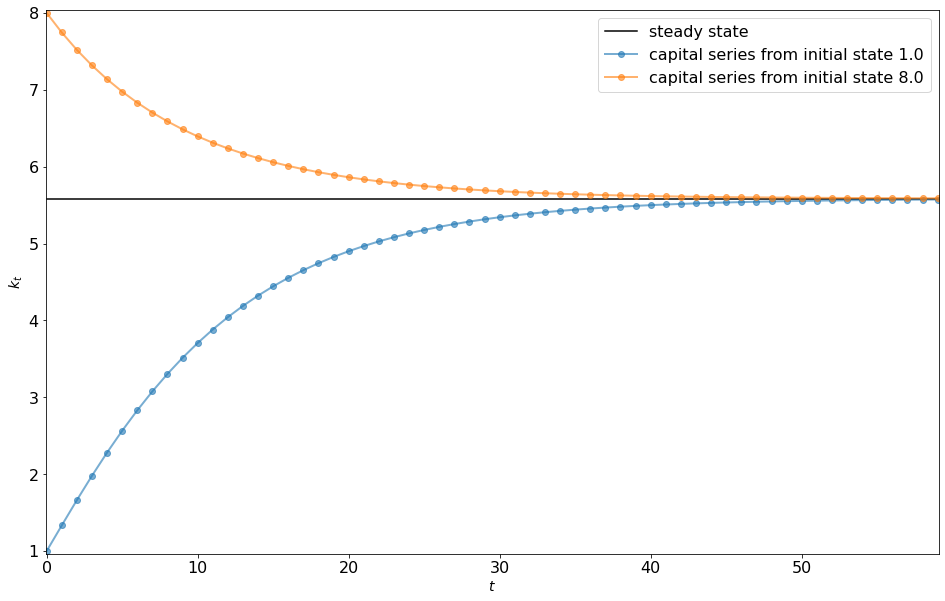

In [40]:
plt.rcParams.update({'font.size': 16})
s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

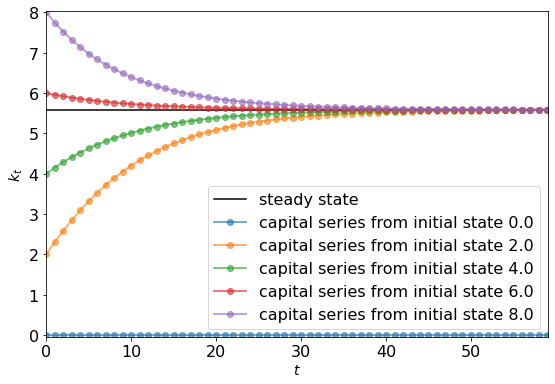

In [41]:

k_vals = [float(i)for i in range(0, 10, 2)]
simulations = []
for k in k_vals:
    simulations.append(Solow(k = k))

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in simulations:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

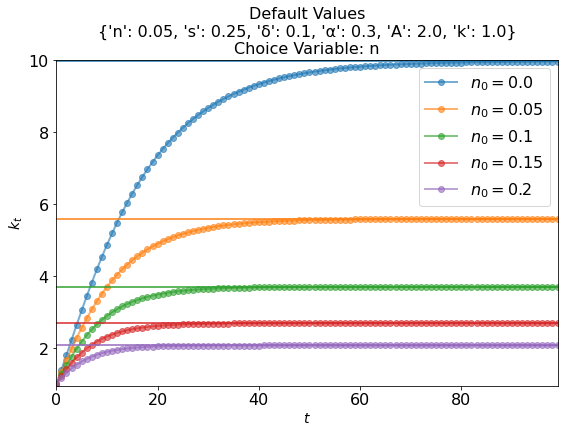

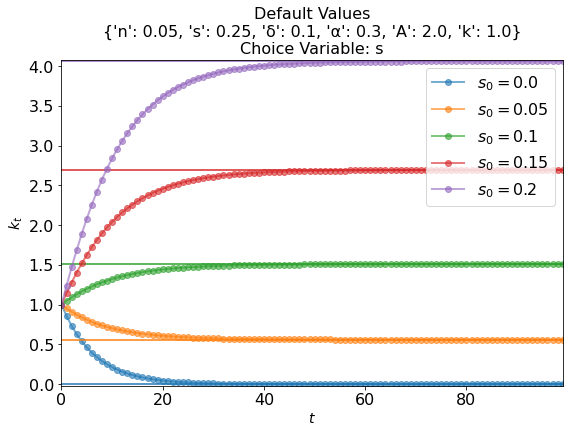

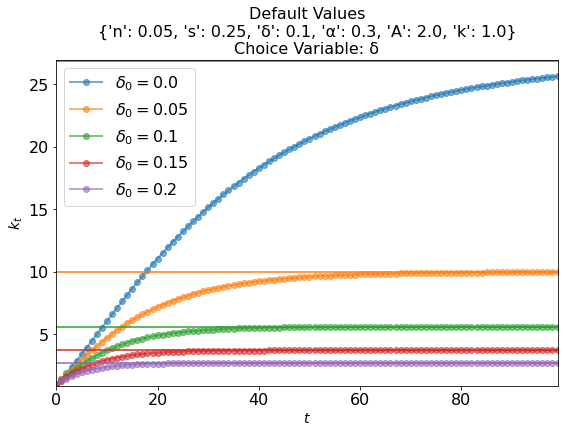

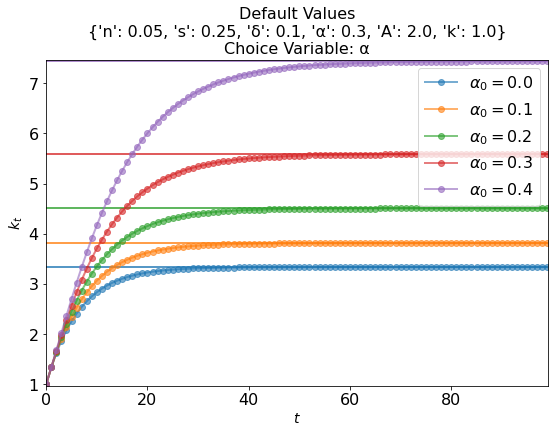

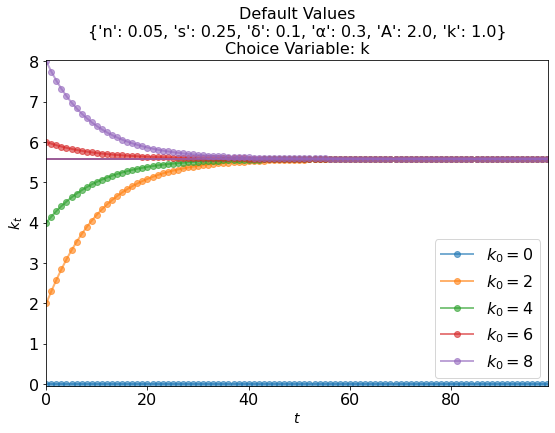

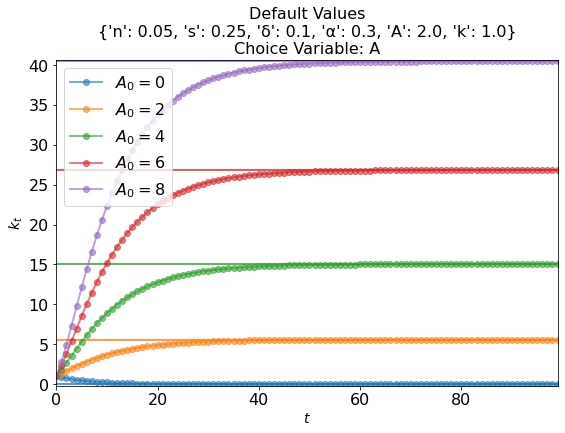

In [42]:
parameter_values = {}
parameter_values["n"] = [i * .05 for i in range(5)] 
parameter_values["s"] = [i * .05 for i in range(5)] 
parameter_values["δ"] = [i * .05 for i in range(5)] 
parameter_values["α"] = [i * .1 for i in range(5)] 
parameter_values["k"] = [i for i in range(0, 10, 2)] 
parameter_values["A"] = [i for i in range(0, 10, 2)] 


for param, param_vals in parameter_values.items():
    simulations = []
    T = 100
    for val in param_vals:
        simulations.append(Solow(**{param:val}))

    fig, ax = plt.subplots(figsize=(9, 6))

    # Plot the common steady state value of capital

    # Plot time series for each economy
    for i in range(len(simulations)):
        s = simulations[i]
        color = "C" + str(i)
        lb = "$" + param + "_0 = " + str(round(getattr(s, param),2)) + "$"
        ax.plot(s.generate_sequence(T), 'o-', color = color, lw=2, alpha=0.6, label=lb)
        
        # draw a new steady state line for each value
        # For all but k, steady state value will chnage as parameter change 
        ax.plot([s.steady_state()]*T, color = color)
    ax.set_title("Default Values\n" + str(Solow().__dict__).replace("{}","")+"\nChoice Variable: " + param, fontsize = 16)
    ax.set_xlabel('$t$', fontsize=14)
    ax.set_ylabel('$k_t$', fontsize=14)
    ax.legend()
    plt.show()

[Penn World Tables]( https://www.rug.nl/ggdc/productivity/pwt/)

In [39]:
import datetime
import pandas as pd
import numpy as np

PWT = pd.read_excel("https://www.rug.nl/ggdc/docs/pwt100.xlsx", sheet_name = None)
PWT.keys()

dict_keys(['Info', 'Legend', 'Data'])

In [6]:
pd.set_option('display.max_rows', None)
PWT["Legend"]

,Variable name,Variable definition
0,Identifier variables,NaN
1,countrycode,3-letter ISO country code
2,country,Country name
3,currency_unit,Currency unit
4,year,Year
5,NaN,NaN
6,"Real GDP, employment and population levels",NaN
7,rgdpe,Expenditure-side real GDP at chained PPPs (in ...
8,rgdpo,Output-side real GDP at chained PPPs (in mil. ...
9,pop,Population (in millions)


In [7]:
pd.set_option('display.max_rows', 10)
PWT["Data"]

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


In [8]:
identifiers = ["countrycode", "country", "year"]
solow_vars  = ["rgdpna", "pop", "emp","avh", "rnna", "rtfpna", "labsh", "delta", "hc"]
solow_data = PWT["Data"][identifiers + solow_vars]
solow_data.set_index(["countrycode", "year"], inplace = True)
solow_data

country        rgdpna        pop       emp  avh  \
countrycode year                                                     
ABW         1950     Aruba           NaN        NaN       NaN  NaN   
            1951     Aruba           NaN        NaN       NaN  NaN   
            1952     Aruba           NaN        NaN       NaN  NaN   
            1953     Aruba           NaN        NaN       NaN  NaN   
            1954     Aruba           NaN        NaN       NaN  NaN   
...                    ...           ...        ...       ...  ...   
ZWE         2015  Zimbabwe  42008.199219  13.814629  6.393752  NaN   
            2016  Zimbabwe  42325.726562  14.030331  6.504374  NaN   
            2017  Zimbabwe  44316.742188  14.236595  6.611773  NaN   
            2018  Zimbabwe  46457.097656  14.438802  6.714952  NaN   
            2019  Zimbabwe  42694.070312  14.645468  6.831017  NaN   

                          rnna    rtfpna     labsh     delta        hc  
countrycode year                                                        
ABW         1950           NaN       NaN       NaN       NaN       NaN  
            1951           NaN       NaN       NaN       NaN       NaN  
            1952           NaN       NaN       NaN       NaN       NaN  
            1953           NaN       NaN       NaN       NaN       NaN  
            1954           NaN       NaN       NaN       NaN       NaN  
...                        ...       ...       ...       ...       ...  
ZWE         2015  64916.476562  0.999666  0.533381  0.052084  2.584653  
            2016  66257.859375  0.980511  0.533381  0.053471  2.616257  
            2017  67627.562500  1.000000  0.533381  0.054693  2.648248  
            2018  69059.625000  1.018163  0.533381  0.055759  2.680630  
            2019  69946.421875  0.917617  0.533381  0.056594  2.713408  

[12810 rows x 10 columns]

In [9]:
ccode_dct = dict(set(list(solow_data.reset_index().set_index(["countrycode", "country"]).index)))

oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania",
             "Luxembourg",
             "Mexico",
             "Netherlands",
             "New Zealand",
             "Norway",
             "Poland",
             "Portugal",
             "Slovakia",
             "Slovenia",
             "South Korea",
             "Spain",
             "Sweden",
             "Switzerland",
             "Turkey",
             "United Kingdom",
             "United States"]
oecd_ccodes = []
for code, country in ccode_dct.items():
    if country in oecd_countries:
        oecd_ccodes.append(code)
solow_data.loc[oecd_ccodes]

country         rgdpna        pop       emp  \
countrycode year                                                    
AUS         1950    Australia  127476.031250   8.354106  3.429873   
            1951    Australia  130718.296875   8.599923  3.523916   
            1952    Australia  125367.687500   8.782430  3.591675   
            1953    Australia  138968.328125   8.950892  3.653409   
            1954    Australia  150078.187500   9.159148  3.731083   
...                       ...            ...        ...       ...   
NLD         2015  Netherlands  877776.750000  16.938499  8.807259   
            2016  Netherlands  897015.125000  16.981295  8.917259   
            2017  Netherlands  923126.312500  17.021347  9.098231   
            2018  Netherlands  944920.687500  17.059560  9.302178   
            2019  Netherlands  960770.875000  17.097130  9.456908   

                          avh          rnna    rtfpna     labsh     delta  \
countrycode year                                                            
AUS         1950  2170.923406  6.399912e+05       NaN  0.680492  0.021166   
            1951  2150.846928  6.901136e+05       NaN  0.680492  0.021674   
            1952  2130.956115  7.045624e+05       NaN  0.680492  0.021954   
            1953  2111.249251  7.331074e+05       NaN  0.680492  0.022079   
            1954  2091.724634  7.714543e+05  0.695180  0.680492  0.022310   
...                       ...           ...       ...       ...       ...   
NLD         2015  1425.813579  4.530820e+06  0.988997  0.591772  0.041971   
            2016  1437.309404  4.575104e+06  0.990747  0.597662  0.042909   
            2017  1436.765644  4.626152e+06  1.000000  0.595293  0.043127   
            2018  1436.403363  4.683135e+06  1.002437  0.595894  0.043249   
            2019  1439.731516  4.748428e+06  0.998827  0.595894  0.043436   

                        hc  
countrycode year            
AUS         1950  2.667302  
            1951  2.674344  
            1952  2.681403  
            1953  2.688482  
            1954  2.695580  
...                    ...  
NLD         2015  3.340310  
            2016  3.354363  
            2017  3.368475  
            2018  3.382647  
            2019  3.396878  

[2590 rows x 10 columns]

In [10]:
solow_data["RGDPPC"] = solow_data["rgdpna"].div(solow_data["emp"])
solow_data["ERC"] = solow_data["rnna"].div(solow_data["emp"])
solow_vars = solow_vars + ["RGDPPC", "ERC"]

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20812\3720578444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solow_data["RGDPPC"] = solow_data["rgdpna"].div(solow_data["emp"])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_20812\3720578444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solow_data["ERC"] = solow_data["rnna"].div(solow_data["emp"])


In [11]:
data_dct = {"Data":solow_data[solow_vars]}
data_dct["Log"] = np.log(data_dct["Data"])
data_dct["LogDiff"] = data_dct["Log"].groupby("countrycode").diff()
data_dct["Log2Diff"] = data_dct["LogDiff"].groupby("countrycode").diff()

In [12]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
def durbin_watson(res_df, res_name):
    res = res_df[res_name]
    res_lag = res_df[res_name + " Lag"]
    dw = res.sub(res_lag).pow(2).sum() / res.pow(2).sum()
    return dw
# ADF
dw = {}
for diff, data in data_dct.items():
    dw[diff] = {}
    for key in data:

#         res_ADF_aut = sm.tsa.stattools.adfuller(data[key].dropna(), maxlag = 1, autolag = None,
#                                                regression="c", regresults = True)
        lag_name = key + " Lag"
        reg_data = data[[key]]
        reg_data[lag_name] = data[key].groupby("countrycode").shift()
        reg_data.loc[:, "constant"] = 1
        reg_data.dropna(inplace=True)
        y = reg_data[key]
        X = reg_data[[lag_name]]#, "constant"]]
        lag_reg = sm.OLS(y,X)
        result = lag_reg.fit()
        #     tests[diff]["ADF"] = res_ADF_aut[0]
        #     tests[diff]["ADF"] = res_ADF_aut[1]
        ry_name = "$\mu$"
        reg_data[ry_name] = result.resid
        reg_data[ry_name + " Lag"] = reg_data["$\mu$"].groupby("countrycode").shift() 
        res_df = reg_data[[ry_name, ry_name + " Lag"]]
        dw[diff][key] = durbin_watson(res_df.dropna(), ry_name)
        
        
        
2 - pd.DataFrame(dw).round(1)

,Data,Log,LogDiff,Log2Diff
rgdpna,1.2,0.6,-0.3,-0.2
pop,1.9,1.9,0.0,0.0
emp,1.5,1.3,-0.3,-0.1
avh,0.0,0.0,0.0,-0.4
rnna,2.0,1.8,0.0,0.0
...,...,...,...,...
labsh,-0.1,-0.1,0.0,-0.4
delta,1.7,1.7,0.8,0.3
hc,1.8,1.9,0.0,0.0
RGDPPC,0.6,0.5,-0.2,-0.3


In [13]:
import linearmodels as lm
reg_data = data_dct["Log"].copy()
reg_data.rename(columns = {"RGDPPC":"y",
                          "ERC":"k",
                           "hc":"H",
                          "rtfpna":"A"}, inplace = True)
reg_data["year"] = reg_data.index.get_level_values("year")
reg_data["Constant"] = 1
y_name = ["y"]
lag_name = y_name[0] + " Lag"
x_names = [lag_name, "A", "k","Constant"]
reg_data[lag_name] = reg_data[y_name].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.638e+05
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:20:13   Log-Likelihood:                 6411.5
No. Observations:                3135   AIC:                        -1.282e+04
Df Residuals:                    3131   BIC:                        -1.279e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y Lag          0.9928      0.003    318.656      0.000       0.987       0.999
A             -0.0255      0.003     -8.626      0.000      -0.031      -0.020
k              0.0014      0.002      0.580      0.562      -0.003       0.006
Constant       0.0793      0.011      7.028      0.000       0.057       0.101
==============================================================================
Omnibus:                      446.227   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3642.289
Skew:                          -0.415   Prob(JB):                         0.00
Kurtosis:                       8.215   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [14]:
reg_data = data_dct["LogDiff"].copy()
reg_data.rename(columns = {"RGDPPC":"y",
                          "ERC":"k",
                           "hc":"H",
                          "rtfpna":"A"}, inplace = True)
reg_data["Constant"] = 1
y_name = ["y"]
lag_name = y_name[0] + " Lag"
x_names = [lag_name, "A", "k", "Constant"]
reg_data[lag_name] = reg_data[y_name].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     4195.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:20:13   Log-Likelihood:                 9952.7
No. Observations:                3068   AIC:                        -1.990e+04
Df Residuals:                    3064   BIC:                        -1.987e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y Lag          0.0454      0.007      6.105      0.000       0.031       0.060
A              0.9500      0.011     86.628      0.000       0.929       0.972
k              0.4419      0.011     41.268      0.000       0.421       0.463
Constant       0.0040      0.000     15.511      0.000       0.003       0.004
==============================================================================
Omnibus:                      587.637   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6387.713
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       9.972   Cond. No.                         42.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [15]:
reg_data["Constant"] = 1
y_name = ["y"]
lag_name = y_name[0] + " Lag"
x_names = [lag_name, "A", "H",  "k", "Constant"]
reg_data[lag_name] = reg_data[y_name].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3424.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:20:13   Log-Likelihood:                 9952.4
No. Observations:                3004   AIC:                        -1.989e+04
Df Residuals:                    2999   BIC:                        -1.986e+04
Df Model:                           4                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y Lag          0.0442      0.007      6.079      0.000       0.030       0.058
A              0.9659      0.010     93.129      0.000       0.946       0.986
H              0.5523      0.038     14.608      0.000       0.478       0.626
k              0.4304      0.010     41.712      0.000       0.410       0.451
Constant      -0.0004      0.000     -1.100      0.271      -0.001       0.000
==============================================================================
Omnibus:                      523.226   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8120.619
Skew:                           0.339   Prob(JB):                         0.00
Kurtosis:                      11.026   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [16]:
y_name = ["y"]
lag_name = y_name[0] + " Lag"
reg_data["Constant"] = 1
x_names = [lag_name, "A", "H",  "k", "Constant"]
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3424.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:20:13   Log-Likelihood:                 9952.4
No. Observations:                3004   AIC:                        -1.989e+04
Df Residuals:                    2999   BIC:                        -1.986e+04
Df Model:                           4                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y Lag          0.0442      0.007      6.079      0.000       0.030       0.058
A              0.9659      0.010     93.129      0.000       0.946       0.986
H              0.5523      0.038     14.608      0.000       0.478       0.626
k              0.4304      0.010     41.712      0.000       0.410       0.451
Constant      -0.0004      0.000     -1.100      0.271      -0.001       0.000
==============================================================================
Omnibus:                      523.226   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8120.619
Skew:                           0.339   Prob(JB):                         0.00
Kurtosis:                      11.026   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [17]:
reg_data = data_dct["LogDiff"].copy()
reg_data.rename(columns = {"RGDPPC":"y",
                          "ERC":"k",
                           "hc":"H",
                          "rtfpna":"A"}, inplace = True)
y_name = ["y"]
lag_name = y_name[0] + " Lag"
x_names = [lag_name, "A", "H",  "k"]
reg_data[lag_name] = reg_data[y_name].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              6378.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:20:13   Log-Likelihood:                          10171.
No. Observations:                3068   AIC:                                 -2.033e+04
Df Residuals:                    3064   BIC:                                 -2.031e+04
Df Model:                           4                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y Lag          0.0403      0.007      5.795      0.000       0.027       0.054
A              0.9655      0.010     96.299      0.000       0.946       0.985
H              0.5353      0.026     20.836      0.000       0.485       0.586
k              0.4286      0.010     43.445      0.000       0.409       0.448
==============================================================================
Omnibus:                      543.722   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8207.375
Skew:                           0.374   Prob(JB):                         0.00
Kurtosis:                      10.978   Cond. No.                         6.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [18]:
corr_df = reg_data[y_name + x_names].corr()
corr_df

,y,y Lag,A,H,k
y,1.000000,0.353097,0.861783,0.046515,0.480436
y Lag,0.353097,1.000000,0.195343,0.040379,0.371635
A,0.861783,0.195343,1.000000,-0.119520,0.084029
H,0.046515,0.040379,-0.119520,1.000000,0.090885
k,0.480436,0.371635,0.084029,0.090885,1.000000


Text(0.5, 0.915, 'Correlation')

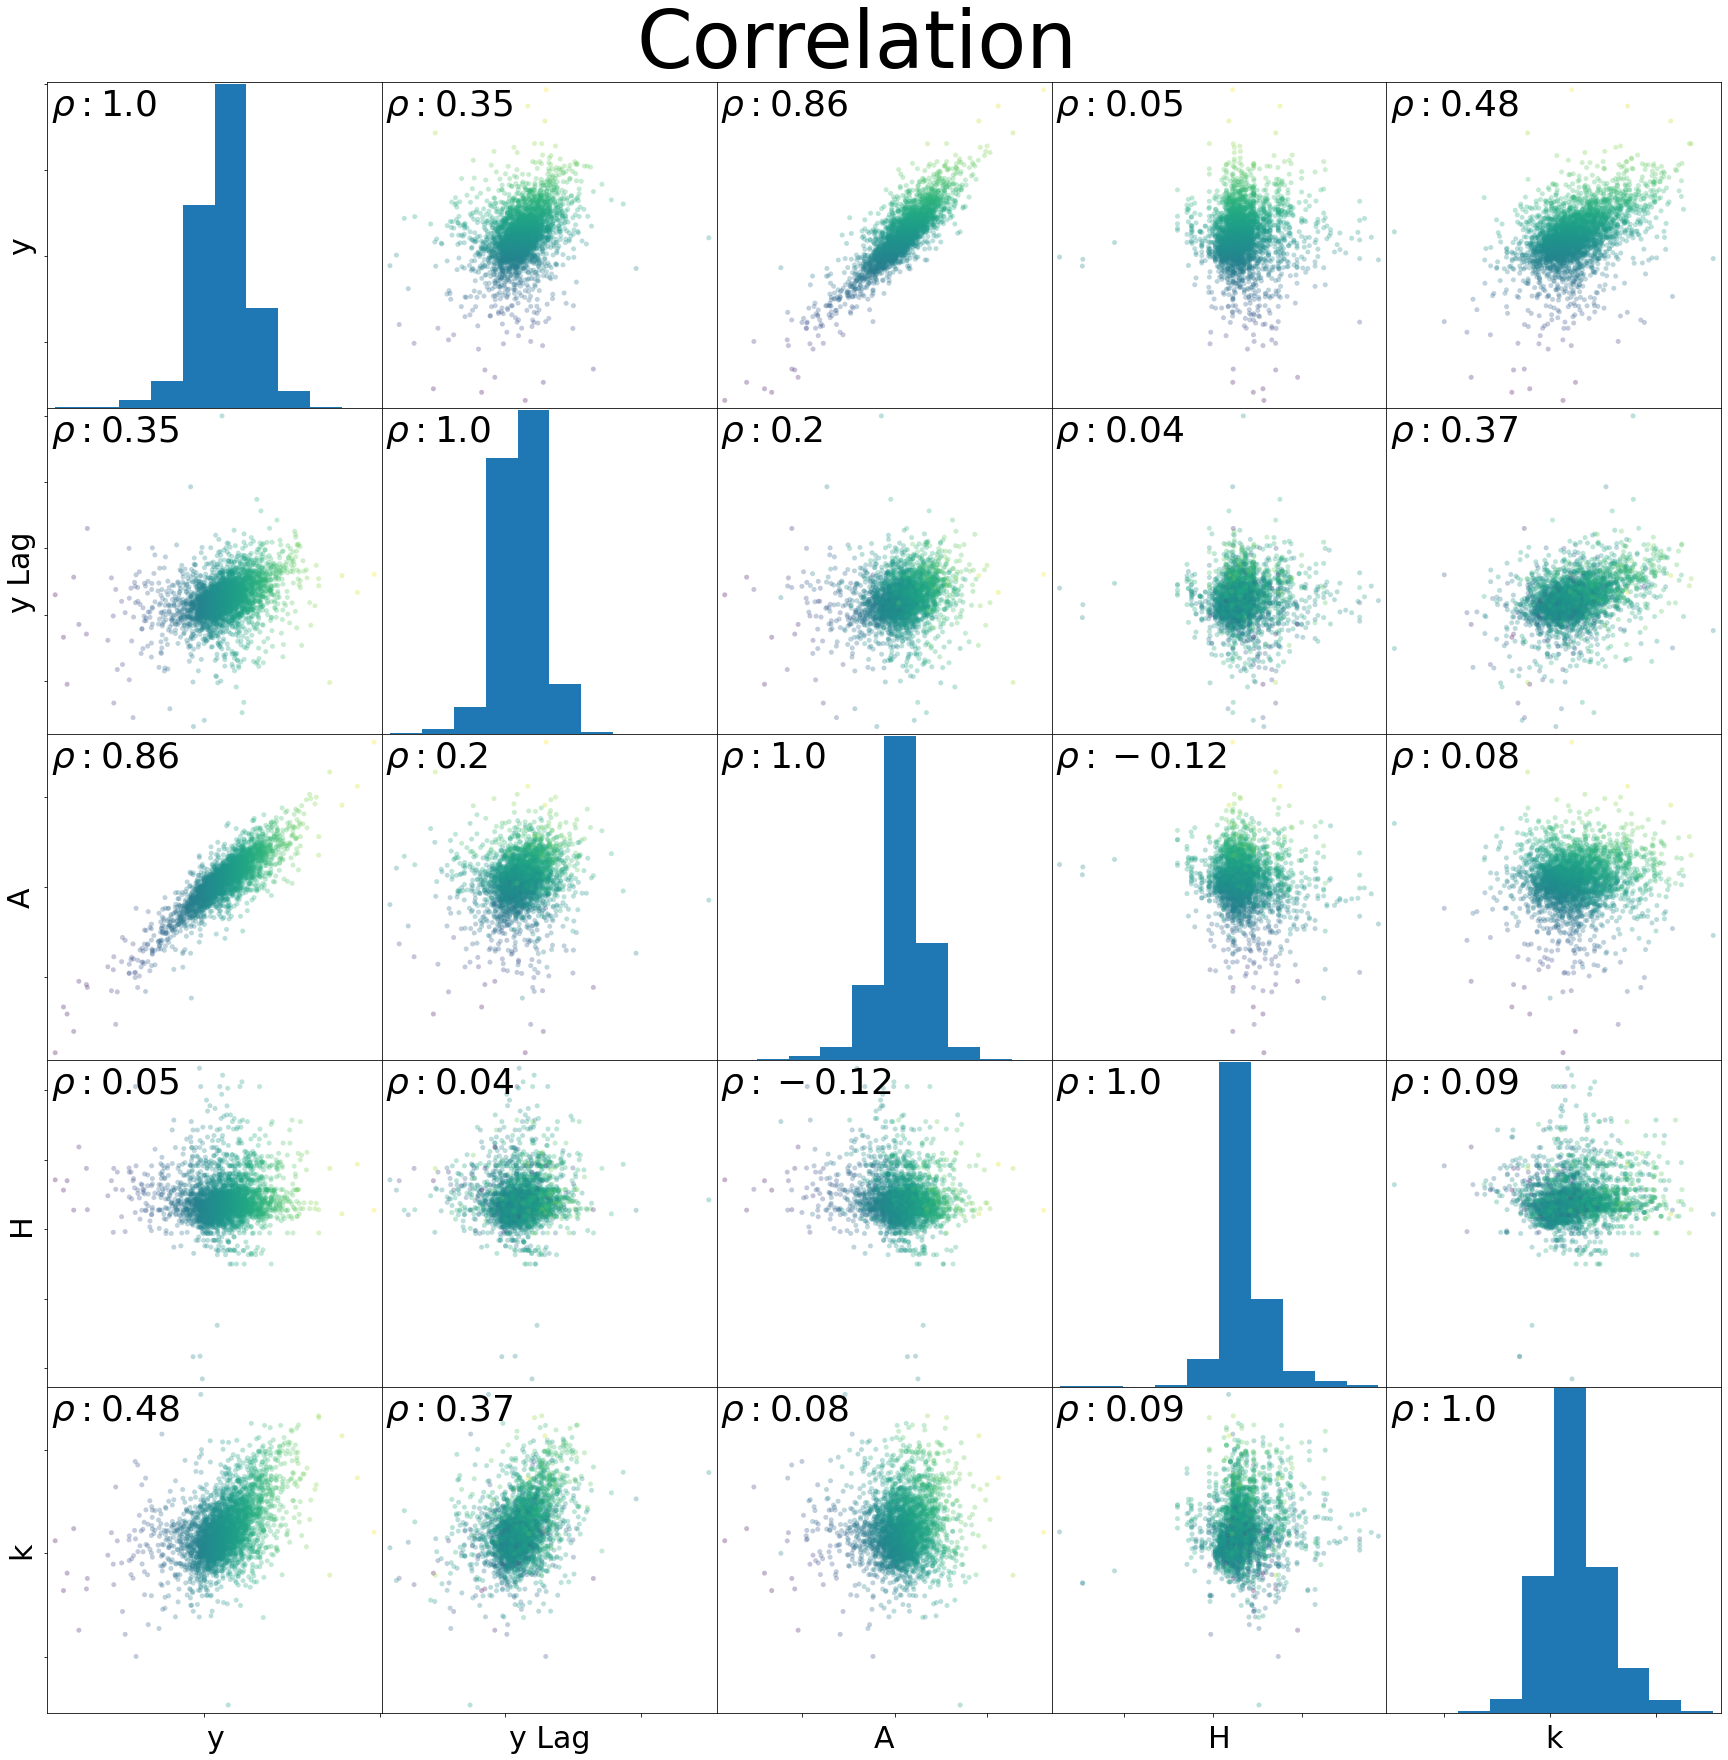

In [19]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
keys = list(corr_df.keys())
dim = len(keys)

fig, ax = plt.subplots(figsize = (30, 30))
a = pd.plotting.scatter_matrix(reg_data[keys],c = reg_data["y"],s = 100, alpha = .3, ax=ax)  


for i in range(len(keys)):
    x = keys[i]
    for j in range(len(keys)):
        y = keys[j]
        a[i][j].set_xticklabels([])
        a[i][j].set_yticklabels([])
        a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .88, x = 0.01, ha = "left")        
plt.suptitle("Correlation",y = .915, fontsize = 80)

In [20]:
reg_data = data_dct["LogDiff"].copy()
reg_data.rename(columns = {"rgdpna":"y",
                          "rnna":"k",
                           "hc":"H",
                           "emp":"L",
                          "rtfpna":"A"}, inplace = True)
y_name = ["y"]
lag_name = y_name[0] + " Lag"
x_names = [lag_name, "A", "L", "H",  "k"]
reg_data[lag_name] = reg_data[y_name].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          1.175e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:20:15   Log-Likelihood:                          10192.
No. Observations:                3068   AIC:                                 -2.037e+04
Df Residuals:                    3063   BIC:                                 -2.034e+04
Df Model:                           5                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y Lag          0.0323      0.008      4.201      0.000       0.017       0.047
A              0.9647      0.010     96.592      0.000       0.945       0.984
L              0.5908      0.013     46.796      0.000       0.566       0.616
H              0.4447      0.033     13.452      0.000       0.380       0.509
k              0.4399      0.012     37.527      0.000       0.417       0.463
==============================================================================
Omnibus:                      576.467   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8625.090
Skew:                           0.445   Prob(JB):                         0.00
Kurtosis:                      11.166   Cond. No.                         10.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

Text(0.5, 0.915, 'Correlation')

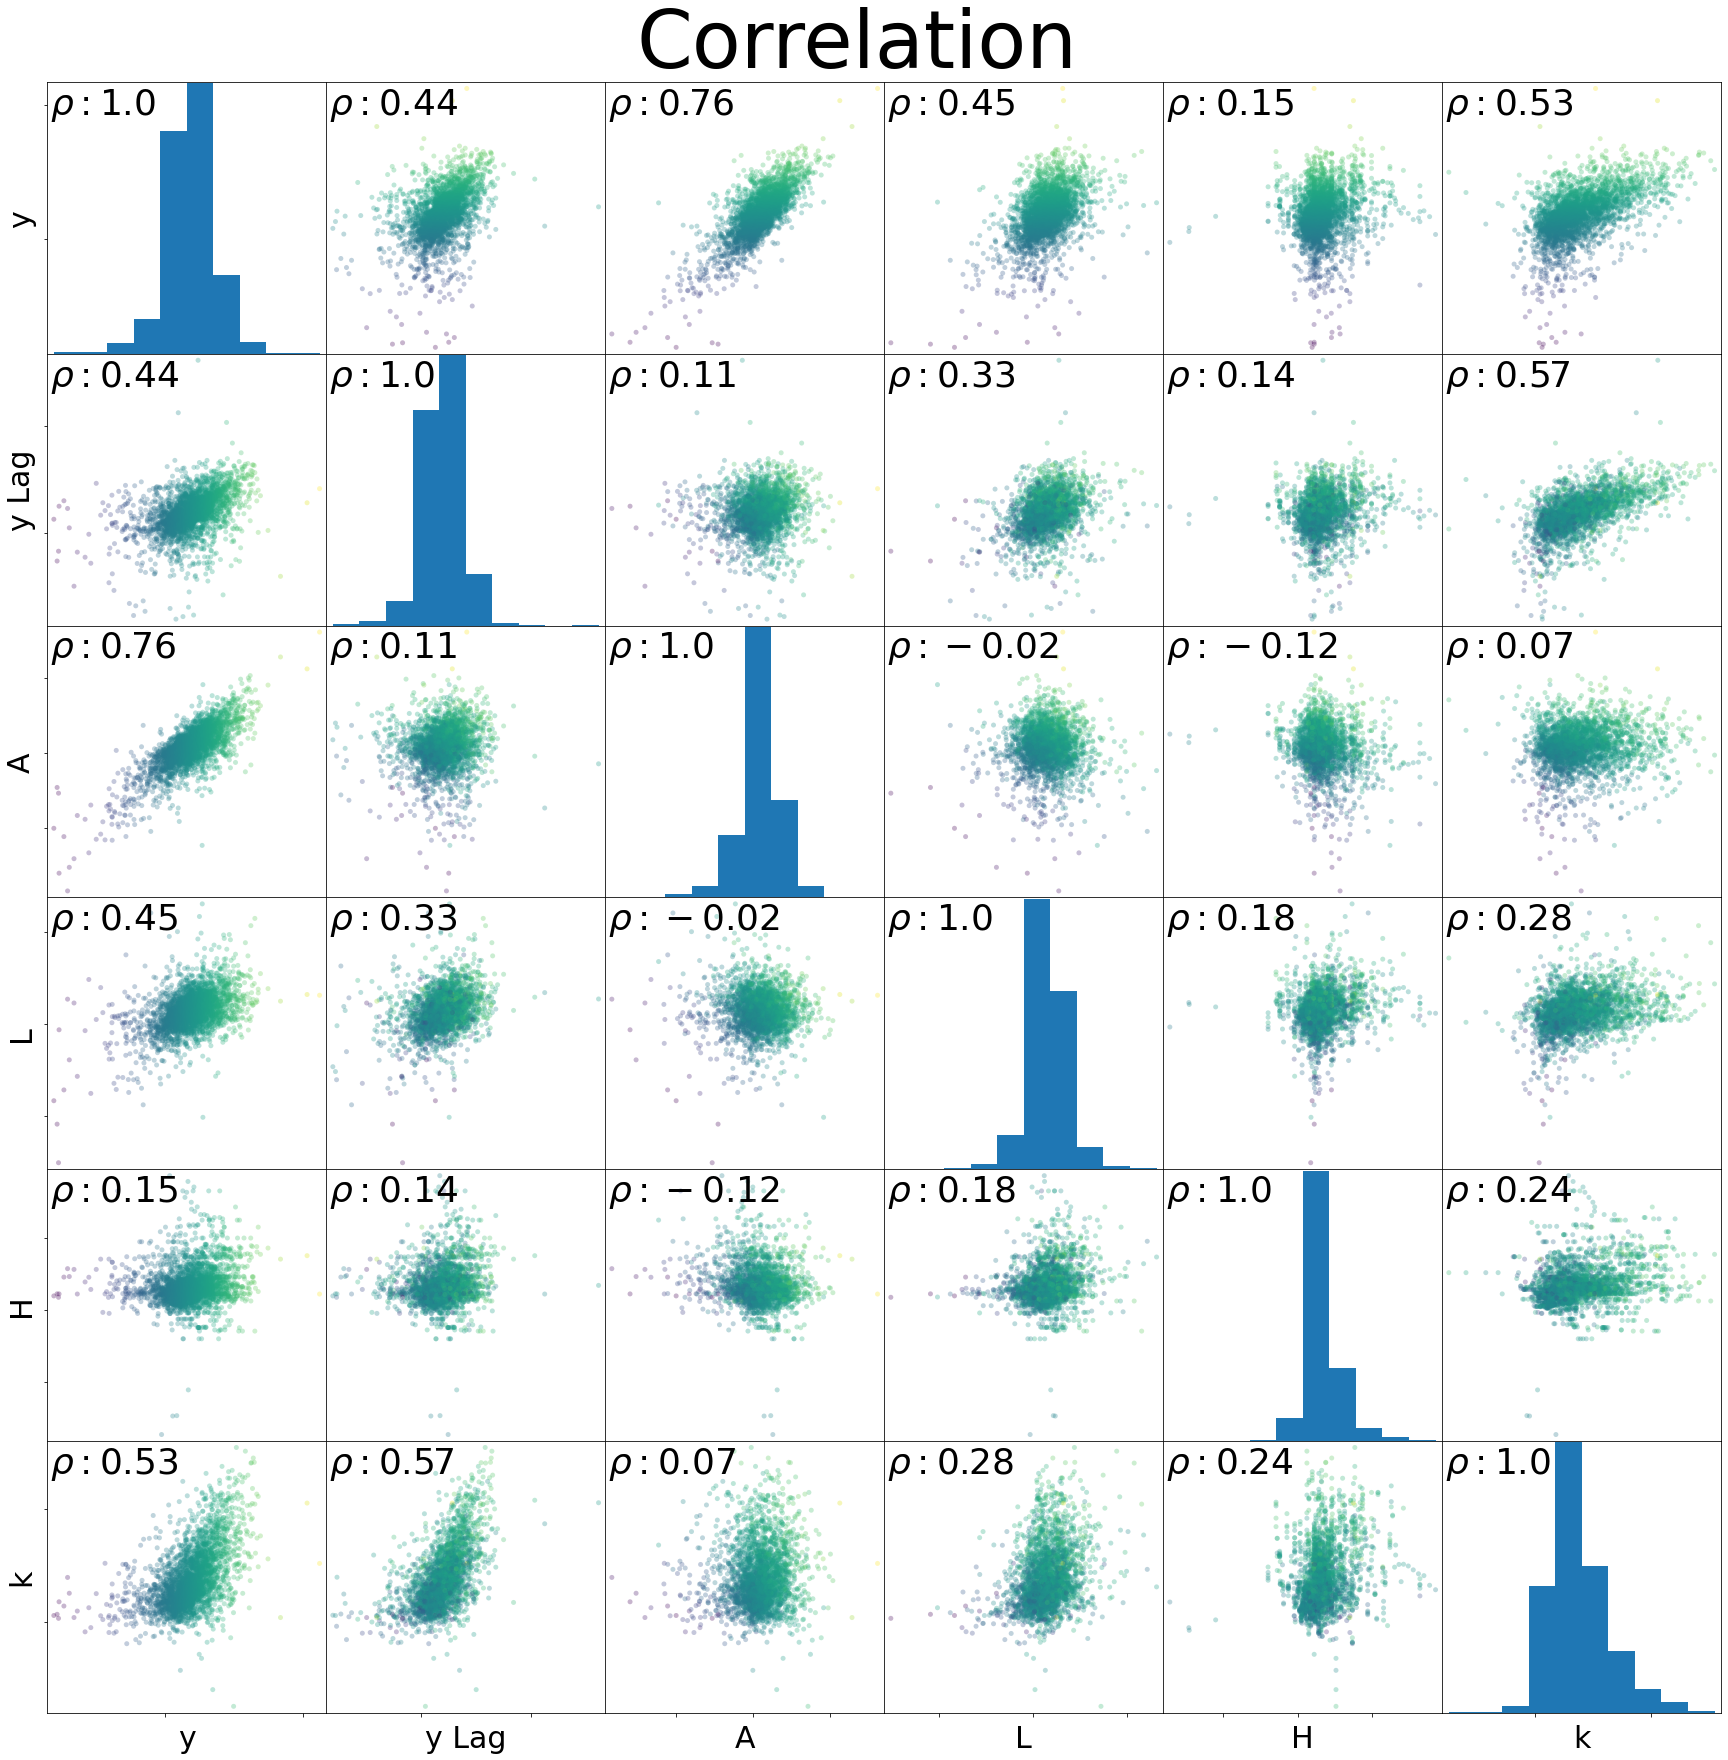

In [21]:
corr_df = reg_data[y_name + x_names].corr()
keys = list(corr_df.keys())
dim = len(keys)

fig, ax = plt.subplots(figsize = (30, 30))
a = pd.plotting.scatter_matrix(reg_data[keys],c = reg_data["y"],s = 100, alpha = .3, ax=ax)  


for i in range(len(keys)):
    x = keys[i]
    for j in range(len(keys)):
        y = keys[j]
        a[i][j].set_xticklabels([])
        a[i][j].set_yticklabels([])
        a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .86, x = 0.01, ha = "left")        
plt.suptitle("Correlation",y = .915, fontsize = 80)

<AxesSubplot:xlabel='A', ylabel='y'>

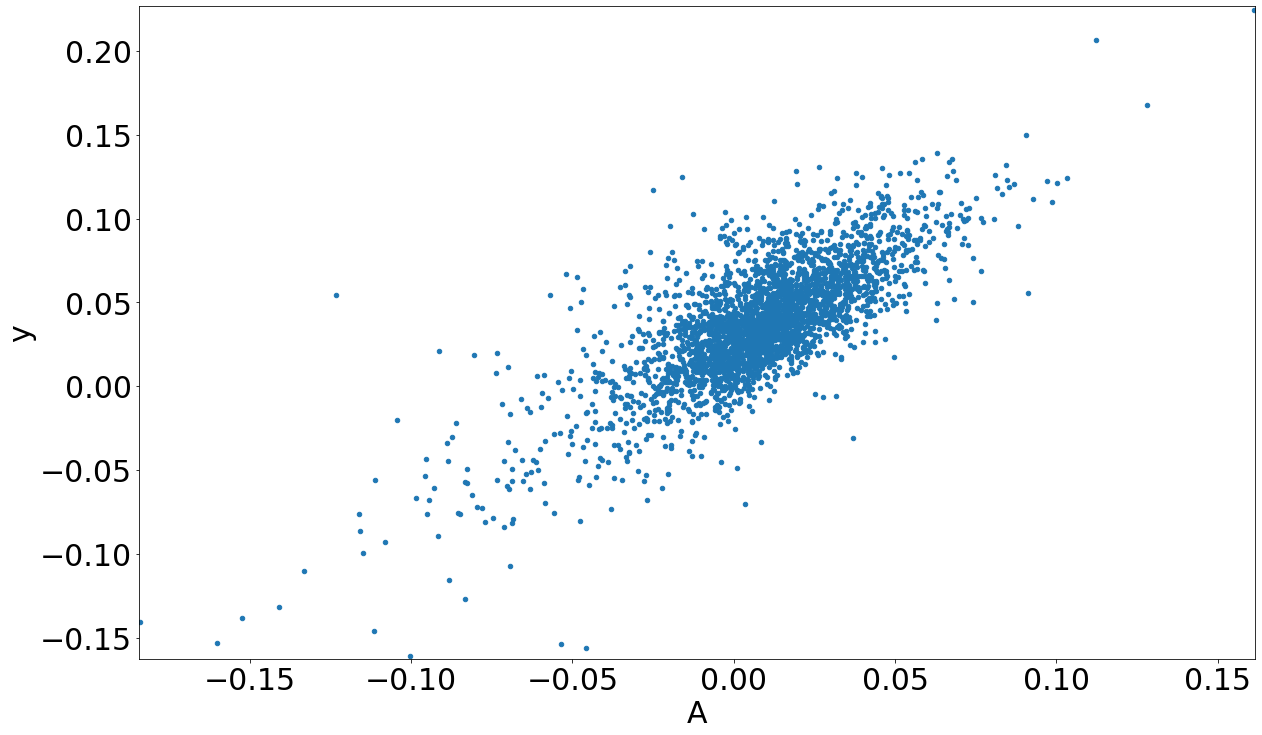

In [22]:
fig, ax = plt.subplots(figsize = (20, 12))
reg_data.plot.scatter(x = "A", y = "y", ax = ax)

In [ ]:
reg_data = data_dct["LogDiff"].loc[oecd_ccodes]
reg_data.rename(columns = {"RGDPPC":"y",
                          "ERC":"k",
                           "hc":"H",
                          "rtfpna":"A"}, inplace = True)
y_name = ["y"]
lag_name = y_name[0] + " Lag"
x_names = [lag_name, "A", "H",  "k"]
reg_data[lag_name] = reg_data[y_name].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()